# Paws & Claws: Petfinder Prediction
Pawfect data analysis of pawfully cute animals in the pet shelter, for predicting adoption speeds pawfectly. Pawfully.
###### By: Gan Kah Ee, Nicolette Hay and Bhargav Singapuri

Dataset from Kaggle : **"Petfinder.my Adoption Prediction"** by *Petfinder.my*  
Source: https://www.kaggle.com/c/petfinder-adoption-prediction/ (requires login)

---
## Introduction

As pet lovers, we certainly do not like seeing stray animals suffer without a comfortable home. Even when stray animals are taken in by animal welfare organisations, some are still eventually euthanised due to an utter lack of space, because suitable homes are not found in time and they are not adopted fast enough. We have think that animal adoption rates are strongly correlated to the metadata associated with their online profiles, such as descriptive text. If we know how fast animals with certain characteristics are adopted, pet shelter workers and rescuers can improve on the animals’ profile appeal, hence improving animal adoption performance and minimising euthanisation. 
This will save many innocent animals around the world.

Therefore, in this Notebook, we are using different prediction models to predict current adoption speeds of the animals in the pet shelter. We will then evaluate and decide on the best model. Then based on the findings of the model, we can see what are the factors that affect the adoption of pets and hopefully reduce the euthanisation of animals.

---

## Essential Libraries

First, import the libraries needed for this notebook to run.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  
> JSON : Library for reading JSON files   
> GraphViz : Library for visualising Tree Graphs   
> Plotly : Library for High-level Data Visualisation    
> XGBoost : Library for the XGBoost Model   
> Keras : Powerful Neural Netword API   
> Counter : Tool to help count iterations of item 

> Sklearn : Library for powerful models and analysis tools
- DecisionTree
- RandomForest
- AdaBoost
- Bagging
- SVC
- KNeighbours  
- TrainTestSplit
- AccuracyScore
- ConfusionMatrix
 
> NLTK : Library for Natural Language Processing
- Stopwords
- PorterStemmer
- WordTokenise

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json
import graphviz
import plotly.express as px
sb.set()
import plotly.offline as py
import plotly.graph_objs as go

# Import models from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from tensorflow import keras
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

---
## Setup 

### Import the Dataset

Read the dataset **"train.csv"** into a Pandas `DataFrame` using the `read_csv` fucntion.

In [2]:
animalData = pd.read_csv('train.csv')
animalData.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

### Data Description

The Description of the Data, from Kaggle, is as follows:
> * **PetID** - Unique hash ID of pet profile
> * **AdoptionSpeed** - Categorical speed of adoption. Lower is faster. This is the value to predict.
> * **Type** - Type of animal (1 = Dog, 2 = Cat)
> * **Name** - Name of pet (Empty if not named)
> * **Age** - Age of pet when listed, in months
> * **Breed1** - Primary breed of pet 
> * **Breed2** - Secondary breed of pet, if pet is of mixed breed 
> * **Gender** - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
> * **Color1** - Color 1 of pet (This is the base colour of the animal)
> * **Color2** - Color 2 of pet 
> * **Color3** - Color 3 of pet 
> * **MaturitySize** - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
> * **FurLength** - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
> * **Vaccinated** - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
> * **Dewormed** - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
> * **Sterilized** - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
> * **Health** - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
> * **Quantity** - Number of pets represented in profile
> * **Fee** - Adoption fee (0 = Free)
> * **State** - State location in Malaysia
> * **RescuerID** - Unique hash ID of rescuer
> * **VideoAmt** - Total uploaded videos for this pet
> * **PhotoAmt** - Total uploaded photos for this pet
> * **Description** - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.



### Import JSON Files

The dataset comes with `JSON` files containing the sentiment analysis of the **Description** column. These sentiment analyses are done by Google's Natural Language Processing API to produce a line-by-line scoring of a given text. The metrics are:

> Score : A Numeric rating from `-1.0` to `1.0` showing the overall emotional leaning of the text   
> Magnitude : Indicates the overall strength of the text ranging from `0` to `+inf`. It is not normalised like Score and hence longer texts may have greater magnitudes   

We import these files and extract the **Magnitude** and **Score** values using the `JSON` library and add it to the `animalData` DataFrame

***Note:*** Not all animals have an associated sentiment analysis as some of the texts were in non-English languages. Hence, such blank spaces were filled with the mean values of **Magnitude** and **Score**.

In [3]:
petIDs = np.array(animalData["PetID"])
magnitude = []
score = []

for id in petIDs:
  try: 
    with open("./train_sentiment/" + id + '.json') as json_file:
      itemData = json.load(json_file)
      magnitude.append(itemData["documentSentiment"]["magnitude"])
      score.append(itemData["documentSentiment"]["score"])
  except:
    magnitude.append(None)
    score.append(None)
    pass

jsonData = {"Magnitude" : magnitude, "Score" : score}
animalData = animalData.join(pd.DataFrame(data = jsonData))
del(magnitude, score, jsonData, petIDs)

# Filling in the empty cells with the mean values
animalData.fillna(value = {'Magnitude' : (animalData['Magnitude'].mean()), 
                            'Score' : (animalData['Score'].mean())},
                 inplace = True)

### Word Feature Extraction
#### Preparing the text

We removed small, bridging words that are not usable as proper predictors. These words are known as **Stop Words** and were removed using the `Stopwords` class in `NLTK`. Such words include:
> 2 lettered words: at, on, in, we, etc.   
> 3 lettered words: the, who, why, for, etc.

Words that are 4 letters or longer are more useful in determining text features. To extract such features:
> 1. Convert all words to lower case to prevent repetition.
> 2. Tokenise text into words, thus making them distinguishable.
> 3. Remove stop words.
> 4. Combine words with similar meaning to the same root word using `PorterStemmer`
> 5. Remove words that contain less than 3 letters. We believe words with at least 4 letters are more valuable than shorter words.
> 6. Append these words back as **DescriptionWords**

In [4]:
#create empty list
descriptionWords = []

# Combines words with similar meaning together
stemmer = PorterStemmer()

# Removes words like "it", "the", etc.
sw = stopwords.words("english")

for i in animalData["Description"]:
    i = str(i)
    if i == 'nan':
        i = 'blank'
    text = i.lower()
    words = word_tokenize(i)
    words = [word for word in words if word not in sw]
    words = [stemmer.stem(word) for word in words]
    words = [w for w in words if len(w) > 3]
    words = ' '.join(str(word) for word in words)
    descriptionWords.append(words)
    
animalData = animalData.join(pd.DataFrame(data = {"DescriptionWords" : np.array(descriptionWords)}))
del(descriptionWords)

#### Visualising the Data

Next, to find out the 30 most commonly used words in the **Descriptions**, we used the `Counter` class and plotted the result as a **Bar Chart**.

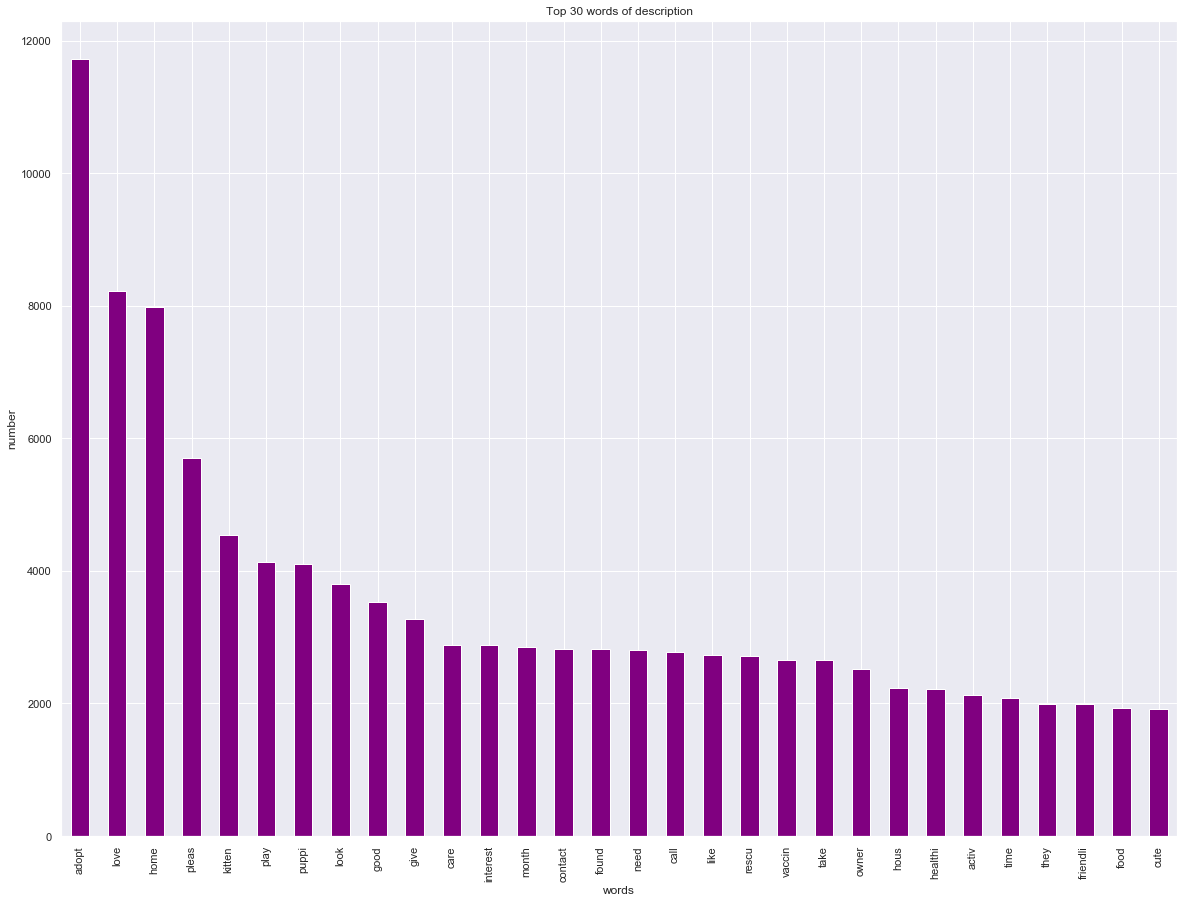

In [5]:
count1 = Counter(" ".join(animalData["DescriptionWords"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of description", 1 : "count"})       

data1.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(data1["words of description"]))
plt.xticks(y_pos, data1["words of description"])
plt.title('Top 30 words of description')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

#### Counting descriptive words in *Descriptions*

Now that we have the Top 30 most commonly used words, we can count how many of such words are there in each **Description** and add them as **GoodWords**.

In [6]:
alist = ["good", "play", "love", "care", "vaccin",
         'friendli', "healthi", "activ", "cute", "rescu", 
         "adopt", "home", "pleas", "kitten", "puppi",
         "look", "give", "interest", "month", "contact",
         "found", "need", "call", "like", "take",
         "owner", "hous", "food", "they", "time"]
# List to contain the count of GoodWords
blist =[]

for words in animalData['DescriptionWords']:
    words = word_tokenize(words)
    length = len([word for word in words if word in alist])
    if length > 0:
        blist.append(length)
    else: 
        blist.append(None)
    
animalData = animalData.join(pd.DataFrame(data = {"GoodWords" : np.array(blist)}))

animalData.fillna(value = {'GoodWords' : (animalData['GoodWords'].mean())},
                 inplace = True)

del(alist, blist)

### Setting column Data Types

Since some of the data is categorical but actually stored as numbers, `Pandas` will interpret it as a `int64` rather than `category` so the following code rectifies that.

In [7]:
animalData = animalData.astype({
    'Type' : 'category',
    'Breed1' : 'category',
    'Breed2' : 'category',
    'Gender' : 'category',
    'Color1' : 'category',
    'Color2' : 'category',
    'Color3' : 'category',
    'MaturitySize' : 'category',
    'FurLength' : 'category',
    'Vaccinated' : 'category',
    'Dewormed' : 'category',
    'Sterilized' : 'category',
    'Health' : 'category',
    'State' : 'category',
    'AdoptionSpeed' : 'category'
})

---
## Data Exploration

Checking the various data types in the `train.csv` using `.info()`

In [8]:
# info about the variables
animalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Type              14993 non-null  category
 1   Name              13736 non-null  object  
 2   Age               14993 non-null  int64   
 3   Breed1            14993 non-null  category
 4   Breed2            14993 non-null  category
 5   Gender            14993 non-null  category
 6   Color1            14993 non-null  category
 7   Color2            14993 non-null  category
 8   Color3            14993 non-null  category
 9   MaturitySize      14993 non-null  category
 10  FurLength         14993 non-null  category
 11  Vaccinated        14993 non-null  category
 12  Dewormed          14993 non-null  category
 13  Sterilized        14993 non-null  category
 14  Health            14993 non-null  category
 15  Quantity          14993 non-null  int64   
 16  Fee               1499

### Visualisation

As you can see, we have a mixture of categorical data and numerical data. For categorical data, we can plot a **countplot**. As for the numeric data, we attempt to visualise the relationship between the numeric data and the response, Adoption Speed. Since the Adoption speed is a categorical variable, we will plot a **3Dscatterplot** and **boxplots**.

#### Categorical Data

Number of Types : 2


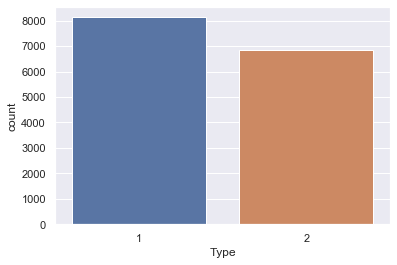

In [9]:
# Number of dogs and cats respectively
# Type of animal (1 = Dog, 2 = Cat)
print("Number of Types :", len(animalData["Type"].unique()))

sb.countplot(animalData["Type"])

Number of Genders : 3


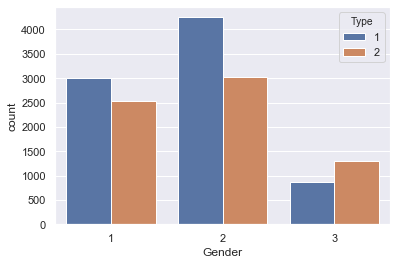

In [10]:
# Gender of animals in the Dataset
# Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
# Type of animal (1 = Dog, 2 = Cat)
print("Number of Genders :", len(animalData["Gender"].unique()))

sb.countplot(data = animalData, x = "Gender", hue = "Type")

Number of Colors : 7
1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: Color1, dtype: int64


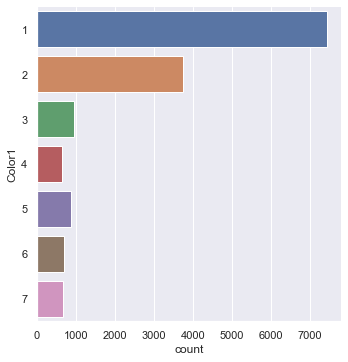

In [11]:
# Fur Color in the Dataset
# 1 = Black, 2 = Brown, 3 = Golden, 4 = Yellow, 5 = Cream, 6 = Grey, 7 = White
print("Number of Colors :", len(animalData["Color1"].unique()))

# Animals of each Gender
print(animalData["Color1"].value_counts())
sb.catplot(y = "Color1", data = animalData, kind = "count")

Number of Colors : 7
0    4471
7    3438
2    3313
5    1128
6    1063
4     870
3     710
Name: Color2, dtype: int64


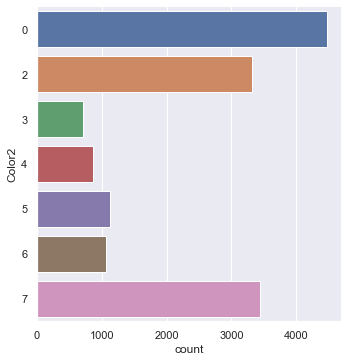

In [12]:
# Fur Color in the Dataset
# 1 = Black, 2 = Brown, 3 = Golden, 4 = Yellow, 5 = Cream, 6 = Grey, 7 = White
print("Number of Colors :", len(animalData["Color2"].unique()))

# Animals of each Color
print(animalData["Color2"].value_counts())
sb.catplot(y = "Color2", data = animalData, kind = "count")

Number of Colors : 6
0    10604
7     3221
5      417
6      378
4      198
3      175
Name: Color3, dtype: int64


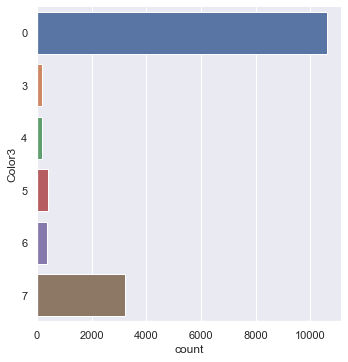

In [13]:
# Fur Color in the Dataset
# 1 = Black, 2 = Brown, 3 = Golden, 4 = Yellow, 5 = Cream, 6 = Grey, 7 = White
print("Number of Colors :", len(animalData["Color3"].unique()))

# Animals of each Fur Color
print(animalData["Color3"].value_counts())
sb.catplot(y = "Color3", data = animalData, kind = "count")

**Color1** refers to the animals' primary fur colour. With reference to the `ColorLabels` dictionary from Kaggle, 1 indicates black and 7 indicates white. This means that a large number of the animals possess black fur colour as their base colour as we are mainly looking at **Color1**, instead of **Color2** and **Color3**. Hence we can gather that the animals generally have dark base fur colours.

Number of MaturitySize : 4
2    10305
1     3395
3     1260
4       33
Name: MaturitySize, dtype: int64


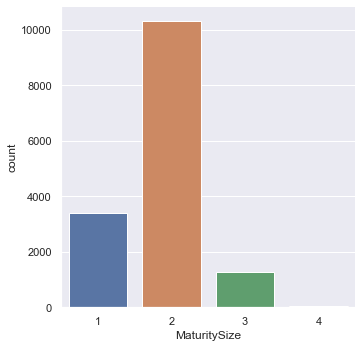

In [14]:
# Maturity Size in the Dataset
#1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified
print("Number of MaturitySize :", len(animalData["MaturitySize"].unique()))

# Animals of each MaturitySize
print(animalData["MaturitySize"].value_counts())
sb.catplot(x = "MaturitySize", data = animalData, kind = "count")

Number of FurLength : 3
1    8808
2    5361
3     824
Name: FurLength, dtype: int64


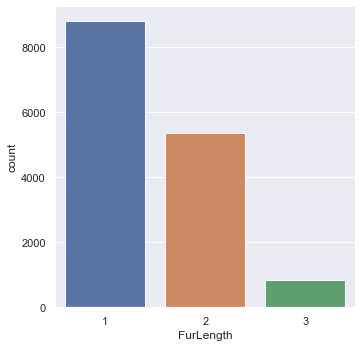

In [15]:
# FurLength in the Dataset
# 1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified
print("Number of FurLength :", len(animalData["FurLength"].unique()))

# Animals of each Furlength
print(animalData["FurLength"].value_counts())
sb.catplot(x = "FurLength", data = animalData, kind = "count")

Number of Vaccinated : 3
2    7227
1    5898
3    1868
Name: Vaccinated, dtype: int64


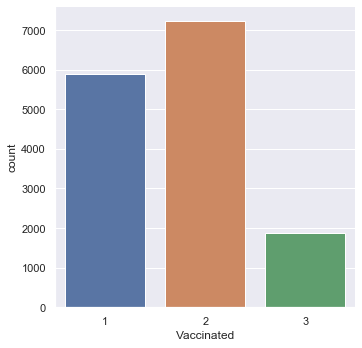

In [16]:
# Vaccinated in the Dataset
# Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
print("Number of Vaccinated :", len(animalData["Vaccinated"].unique()))

# Number of animals Vaccinated
print(animalData["Vaccinated"].value_counts())
sb.catplot(x = "Vaccinated", data = animalData, kind = "count")

Number of Dewormed : 3
1    8397
2    4815
3    1781
Name: Dewormed, dtype: int64


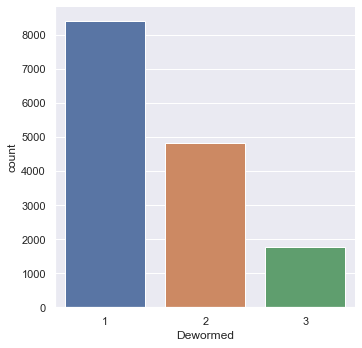

In [17]:
# Dewormed in the Dataset
# Pet has been Dewormed (1 = Yes, 2 = No, 3 = Not Sure)
print("Number of Dewormed :", len(animalData["Dewormed"].unique()))

# Number of animals Dewormed
print(animalData["Dewormed"].value_counts())
sb.catplot(x = "Dewormed", data = animalData, kind = "count")

Number of Sterilized : 3
2    10077
1     3101
3     1815
Name: Sterilized, dtype: int64


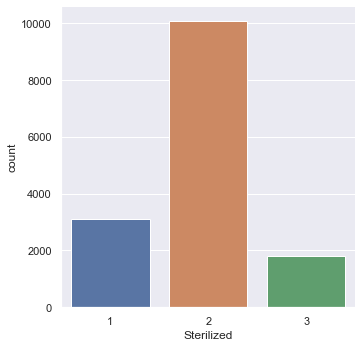

In [18]:
# Sterilized in the Dataset
# Sterilized = Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
print("Number of Sterilized :", len(animalData["Sterilized"].unique()))

# Number of animals Sterilized
print(animalData["Sterilized"].value_counts())
sb.catplot(x = "Sterilized", data = animalData, kind = "count")

Number of Health : 3
1    14478
2      481
3       34
Name: Health, dtype: int64


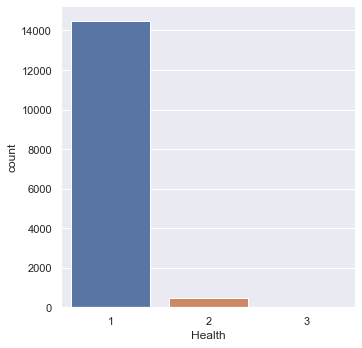

In [19]:
# Health in the Dataset
# Health = Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
print("Number of Health :", len(animalData["Health"].unique()))

# Number of animals in each Health condition
print(animalData["Health"].value_counts())
sb.catplot(x = "Health", data = animalData, kind = "count")

Number of each adoption speed : 5


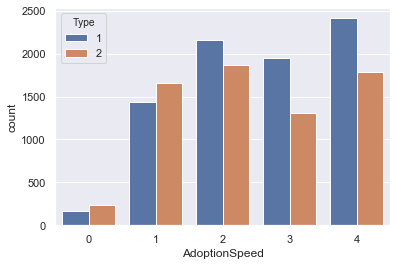

In [20]:
# AdoptionSpeed of animals in the Dataset
# 0 = Pet was adopted on the same day as it was listed,
# 1 = Pet was adopted between 1 and 7 days (1st week) after being listed.
# 2 = Pet was adopted between 8 and 30 days (1st month) after being listed.
# 3 = Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
# 4 = No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).
# Type of animal (1 = Dog, 2 = Cat)

print("Number of each adoption speed :", len(animalData["AdoptionSpeed"].unique()))

sb.countplot(data = animalData, x = "AdoptionSpeed", hue = "Type")

In [21]:
# Population pyramid by Type and Age
# Type of animal (1 = Dog, 2 = Cat)
# Age = Age of pet when listed, in months

layout = go.Layout(barmode = 'overlay',
                   yaxis = go.layout.YAxis(title='Age'),
                   xaxis = go.layout.XAxis(title='Number'))

data = [go.Histogram(
    y = animalData[animalData["Type"] == 1]["Age"],
    orientation = 'h',
    name = 'Dogs',
    marker = dict(color='plum'),
    ybins = go.histogram.YBins(size = 10)
),
    go.Histogram(
        y = animalData[animalData["Type"] == 2]["Age"],
        x = -1 * np.ones(len(animalData[animalData["Type"] == 2]["Age"])),
        orientation = 'h',
        name = 'Cats',
        marker = dict(color='purple'),
        histfunc="sum",
        ybins = go.histogram.YBins(size = 10)
    )
]

py.iplot(dict(data=data, layout=layout))

#### Numeric Data

To look at the relationship between **AdoptionSpeed** and Numeric Data, we first plotted **Magnitude**, **Score** and **GoodWords** on a 3D scatter diagram and set the colour labels as the **AdoptionSpeed**, followed by violinplots of the various Numeric Data against **AdoptionSpeed**.

In [22]:
fig = px.scatter_3d(animalData, x = "Magnitude", y = "Score", z = "GoodWords", color = "AdoptionSpeed", size_max = 5)
fig.show()

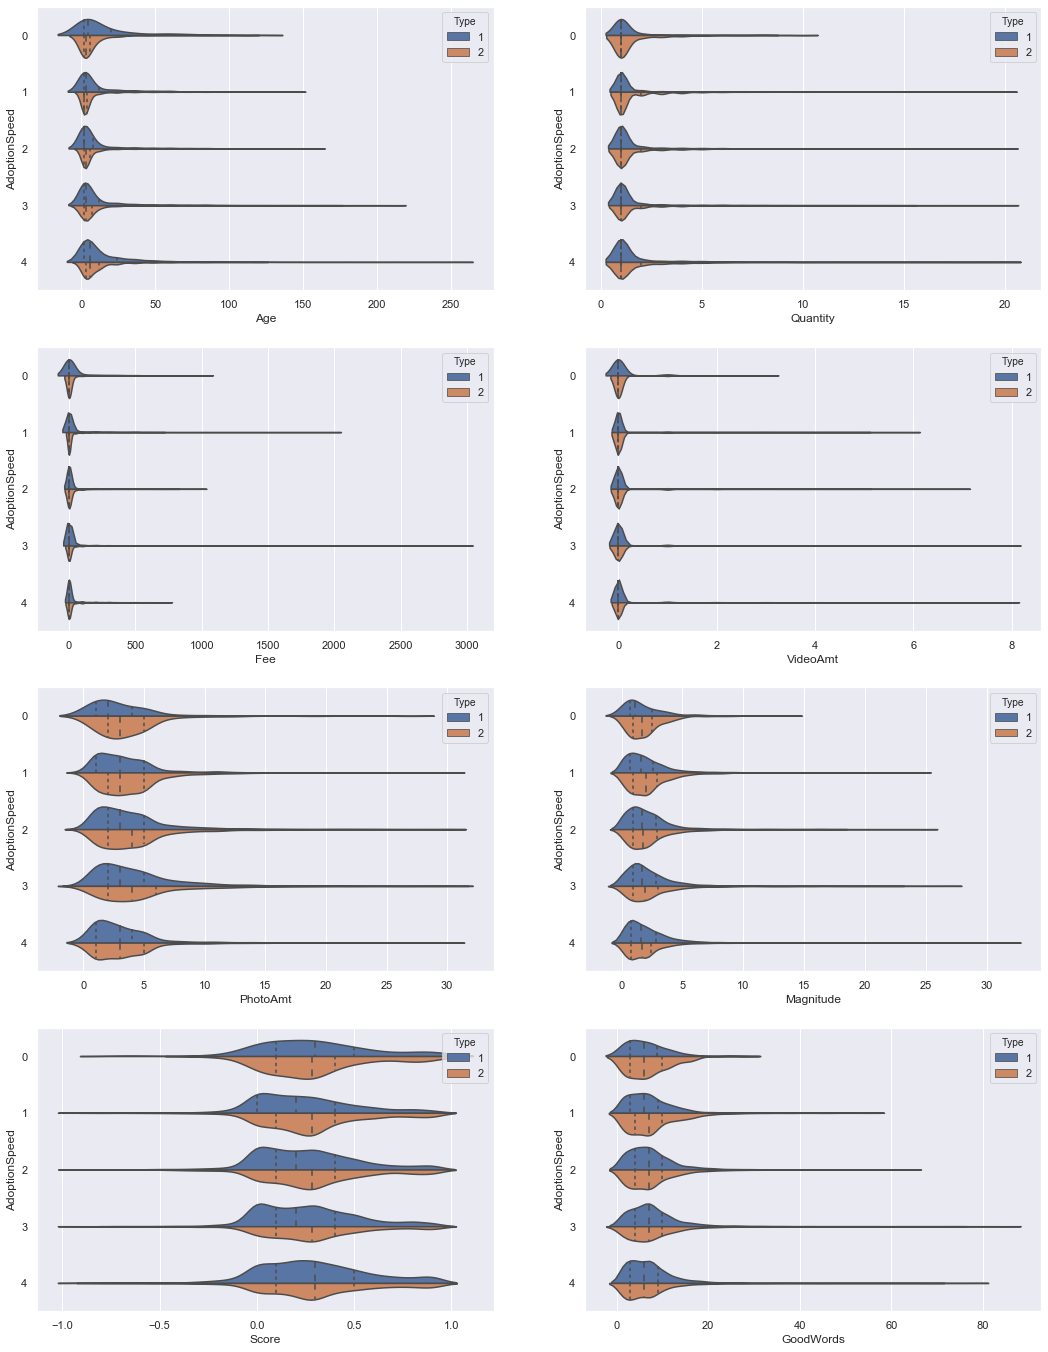

In [23]:
# Relationship between Response and the Predictors
f, axes = plt.subplots(4, 2, figsize=(18, 24))

count = 0
for var in ["Age", "Quantity", "Fee", "VideoAmt", "PhotoAmt", "Magnitude", "Score", "GoodWords"]:
    sb.violinplot(x = var, 
                  y = "AdoptionSpeed", 
                  data = animalData, 
                  orient = "h", 
                  hue = "Type",
                  split = True,
                  scale = "count",
                  inner = "quartile",
                  ax = axes[int(count/2)][count%2])
    count += 1

---
## One-Hot Encoding and Random Train-Test Split

As some predictors, such as **Type** and **Gender**, are discrete variables, we used `One-Hot Encoding`. This has the benefit of weighing each variable properly. 

We then used `Train-Test Split` from `sklearn` to get an unbiased 25-75 split of the data so that we can train the model on one set and test the model on the other set of data.

From the `animalData`, we dropped a few variables that we believe have no relationship with Adoption Speed. We dropped **Breed1**, **Breed2** and **Breed3** as the number of Breeds availabe are too large and diverse, hence making it not very useful in predicting the animal's **AdoptionSpeed**. Like-wise with columns like **Name**, **State**, **RescuerID** and **PetID**.

In [24]:
def encode (header):
    global animalData
    encoded = pd.get_dummies(animalData[header], prefix=header)
    animalData = animalData.drop(columns = [header])
    animalData = animalData.join(encoded)

for header in ["Type", "Gender", "Color1", "Color2", "Color3", "MaturitySize", "FurLength", "Health", "Vaccinated", "Dewormed", "Sterilized"]:
    encode(header)

animalData.head()

Name  Age Breed1 Breed2  Quantity  Fee  State  \
0       Nibble    3    299      0         1  100  41326   
1  No Name Yet    1    265      0         1    0  41401   
2       Brisco    1    307      0         1    0  41326   
3         Miko    4    307      0         1  150  41401   
4       Hunter    1    307      0         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description  ... Health_3  \
0  Nibble is a 3+ month old ball of cuteness. He ...  ...        0   
1  I just found it alone yesterday near my apartm...  ...        0   
2  Their pregnant mother was dumped by her irresp...  ...        0   
3  Good guard dog, very alert, active, obedience ...  ...        0   
4  This handsome yet cute boy is up for adoption....  ...        0   

   Vaccinated_1 Vaccinated_2  Vaccinated_3  Dewormed_1 Dewormed_2  Dewormed_3  \
0             0            1             0           0          1           0   
1             0            0             1           0          0           1   
2             1            0             0           1          0           0   
3             1            0             0           1          0           0   
4             0            1             0           0          1           0   

   Sterilized_1  Sterilized_2  Sterilized_3  
0             0             1             0  
1             0             0             1  
2             0             1             0  
3             0             1             0  
4             0             1             0  

[5 rows x 61 columns]

In [25]:
predictors = animalData.drop(["Name", "Breed1", "Breed2", "State", "RescuerID", "Description", "DescriptionWords", "PetID", "AdoptionSpeed"], axis = 1)
response = pd.DataFrame(animalData["AdoptionSpeed"])
predictors.head()

Age  Quantity  Fee  VideoAmt  PhotoAmt  Magnitude  Score  GoodWords  \
0    3         1  100         0       1.0        2.4    0.3       10.0   
1    1         1    0         0       2.0        0.7   -0.2        3.0   
2    1         1    0         0       7.0        3.7    0.2        9.0   
3    4         1  150         0       8.0        0.9    0.9        5.0   
4    1         1    0         0       3.0        3.7    0.6       18.0   

   Type_1  Type_2  ...  Health_3  Vaccinated_1  Vaccinated_2  Vaccinated_3  \
0       0       1  ...         0             0             1             0   
1       0       1  ...         0             0             0             1   
2       1       0  ...         0             1             0             0   
3       1       0  ...         0             1             0             0   
4       1       0  ...         0             0             1             0   

   Dewormed_1  Dewormed_2  Dewormed_3  Sterilized_1  Sterilized_2  \
0           0           1           0             0             1   
1           0           0           1             0             0   
2           1           0           0             0             1   
3           1           0           0             0             1   
4           0           1           0             0             1   

   Sterilized_3  
0             0  
1             1  
2             0  
3             0  
4             0  

[5 rows x 52 columns]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.25)

---
## Models

Now that the data exploration is done, we shall now proceed onto the classification. 
The types of classification/regression that we will be covering are as follows:

> 1. Decision Tree classifier
> 2. Random Forest
> 3. Extra Trees
> 4. AdaBoost
> 5. XGBoost
> 6. Support Vector Classifier (SVC)
> 7. K-Nearest Neighbors (KNN)
> 8. Bagging Classifier
> 9. Neural Network

### Decision Tree

The `Decision Tree` is a very basic classification model that forms partitions based on certain `criterion`. Usually the criterion used is `'gini'`, which is a measure of misclassification. However, for this dataset, `'entropy'` seems to be a better criterion for partitioning the data space.`'entropy'` maximizes the mutual information (by constructing a equal probability node) in the decision tree.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.41737815723941657

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3646305681515071



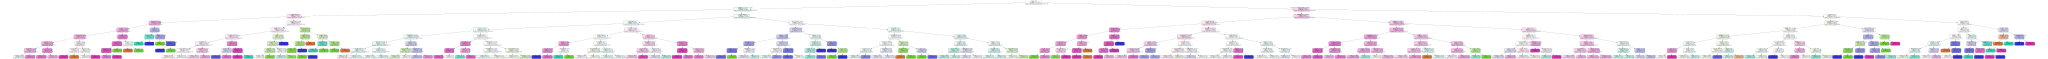

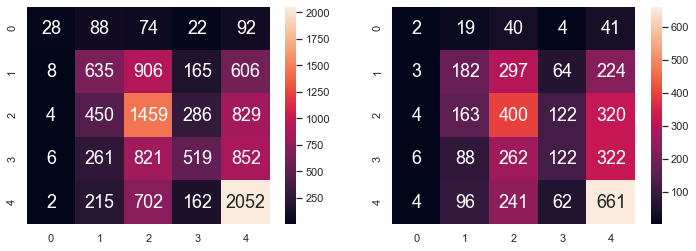

In [27]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy')
dectree.fit(X_train, y_train)                    

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Random Forest

The Decision Tree performs fairly well at this classification. However, the prediction can be further improved with the use of a `Random Forest`. Random Forests use random sub-samples of the dataset and specific features to build multiple decision trees from and then picks trees by a vote. This prevents over-fitting and improve accuracy.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4707399501956599

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3907708722325954



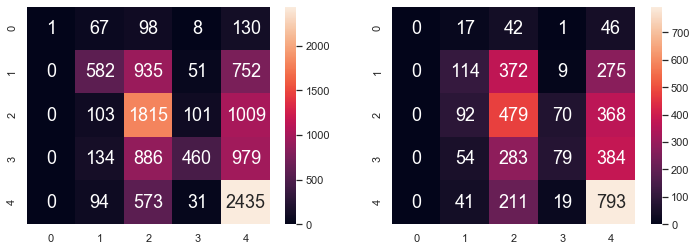

In [28]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 8,
                                 criterion = 'entropy')

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

# Predict AdoptionSpeed 
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Extra Trees

As we can see, there is an improvement to the accuracy of the prediction. However, the model is stil not very accurate at the Train Dataset, achieving just shy of 50% accuracy. Perhaps using an `Extra Trees Classifier`, which stands for Extremely Randomised Trees, to improve the accuracy further. It works in a similar way to Random Forests, however, it is more random in choosing the thresholds as the splitting rule. This allows the reduction of variance of the model at the expense of increased bias.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4307186054784774

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.36623099493198186



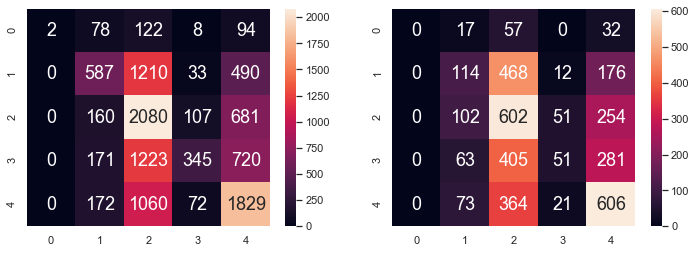

In [29]:
ext = ExtraTreesClassifier(n_estimators = 100,
                           criterion = 'entropy',
                           max_depth = 8,
                           bootstrap = True)
# Fit Random Forest on Train Data
ext.fit(X_train, y_train.values.ravel())

# Predict AdoptionSpeed 
y_train_pred = ext.predict(X_train)
y_test_pred = ext.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", ext.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", ext.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### AdaBoost

Surprisingly, the accuracy drops. The Train accuracy is still below 50%. Which is why use `AdaBoost`, also known as **Gradient Boosted Trees**. It builds the model in stages and it improves the accuracy by **Functional Gradient Descent** algorithms which optimises the Cost function by pointing in the negative gradient direction. 

AdaBoost works by increasing weights on training data that were predicted incorrectly and decreasing weights on training data that were predicted correctly, then the algorithm is conducted on the reweighted data. It also uses Gradient Descent Algorithms.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9491284240483814

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.377967457988797



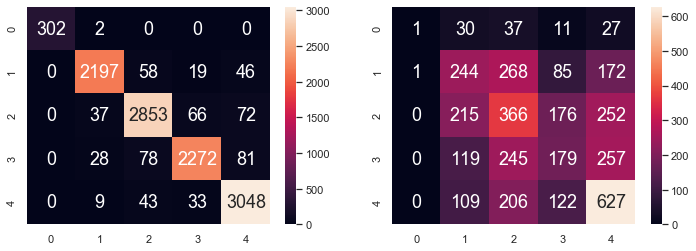

In [30]:
# Create the Ada Boost object
abc = AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 8,
                                 criterion = 'entropy'))

# Fit Random Forest on Train Data
abc.fit(X_train, y_train.values.ravel())

# Predict AdoptionSpeed 
y_train_pred = abc.predict(X_train)
y_test_pred = abc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", abc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", abc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### XGBoost

Finally the Train Dataset has a significantly high accuracy. Despite the Test accuracy being lower, the Heatmap shows that the values are moving closer to the central diagonal. This means that the predictions are getting more precise. Lesser false positives/negatives. `XGBoost` builds on AdaBoost to provide another Tree-based classification model. 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9584667378157239

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3795678847692718



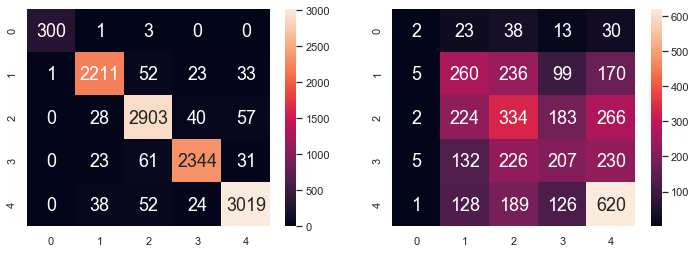

In [31]:
# Create the XGBoost object
XGB = XGBClassifier(max_depth = 8,
                    learning_rate = 0.4,
                    booster = "gbtree")

# Fit Random Forest on Train Data
XGB.fit(X_train, y_train.values.ravel())

# Predict AdoptionSpeed 
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", XGB.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", XGB.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

As we can see, the accuracy stays almost the same for both Train and Test. 

### Support Vector Classifier (SVC)
Now, let us look at some other non-tree based classifiers. First up we have a `Suport Vector Classifier`, which is a model that projects the data into higher dimensions in order to form a hyperplane partition using something called support vectors.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.3329775880469584

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.33929047746065616



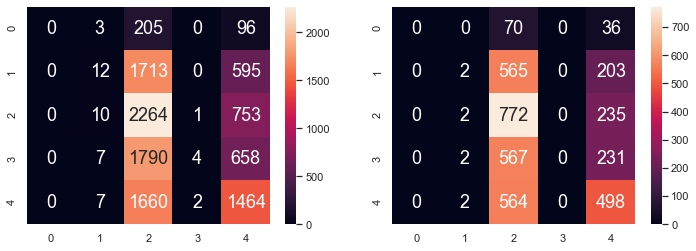

In [32]:
# Create the SVC object
svc = SVC()

# Fit Random Forest on Train Data
svc.fit(X_train, y_train.values.ravel())

# Predict AdoptionSpeed 
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", svc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", svc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### K-Nearest Neighbour(KNN)

As we can see, the model basically puts everything into either category 2 or 4, which gets the accuracy up by pure brute force. Next we look at the `K-Nearest Neighbour` classifier which categorises the data based on the number of neighbours it has. By setting `weights` to distance, the nearer points will have a greater impact on the classification than those further away.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9969761650658129

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.34755934915977593



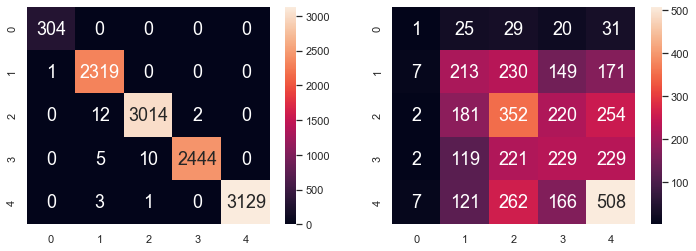

In [33]:
# Create the MNB object
KNN = KNeighborsClassifier(n_neighbors = 6, 
                           weights = 'distance')

# Fit Random Forest on Train Data
KNN.fit(X_train, y_train.values.ravel())

# Predict AdoptionSpeed 
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", KNN.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", KNN.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

This is our most accurate Predictive model yet with a staggering 99.6% accuracy on the train dataset. This means that the results generated on the Test dataset is very likely to be reliable. 

### Bagging Classifier

A `Bagging Classifier` is a meta-classifier that fits base classifiers on random subsets of the original dataset and aggregates the individual predictions.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9831020988971896

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3638303547612697



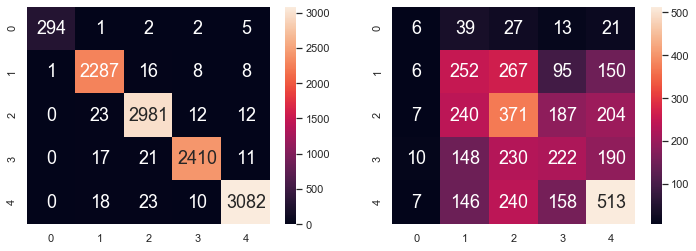

In [34]:
bgc = BaggingClassifier()
# Fit Random Forest on Train Data
bgc.fit(X_train, y_train.values.ravel())

# Predict AdoptionSpeed 
y_train_pred = bgc.predict(X_train)
y_test_pred = bgc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", bgc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", bgc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

As with the K-NearestNeighbours model, the Bagging Classifier also produces very high Train accuracy but the Test accuracy is fairly consistent with the others.

### Neural Network

Lastly, as a bit of extra knowledge, we attempted to build a simple neural network using the `Keras` API from Google's `tensorflow`. This high-level API makes it simple to make customisable neural networks. So to start off simple, our neural network has 52 input layers which narrow down to 5 for the 5 categories of output. 

3749/3749 [==============================] - 0s 38us/sample - loss: 1.3948 - accuracy: 0.3732
Test acc:  0.37316617
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.40546069014585556

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.37316617764737264



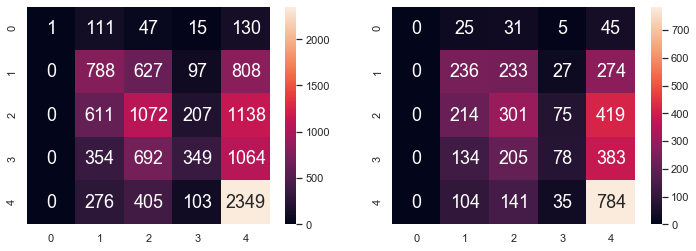

In [35]:
model = keras.Sequential([
    keras.layers.Dense(52, input_shape = (52,)),
    keras.layers.Dense(25, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid"),
    keras.layers.Dense(5, activation = "softmax")
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(X_train, y_train, epochs = 30, verbose = 0)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test acc: ", test_acc)

predictions = model.predict(X_train)
y_train_pred = []

for prediction in predictions:
    y_train_pred.append(np.argmax(prediction))

y_train_pred = pd.DataFrame(np.array(y_train_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", accuracy_score(y_train, y_train_pred))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
matrix = confusion_matrix(y_train, y_train_pred)
sb.heatmap(matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

predictions = model.predict(X_test)
y_test_pred = []

for prediction in predictions:
    y_test_pred.append(np.argmax(prediction))

y_test_pred = pd.DataFrame(np.array(y_test_pred))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test, y_test_pred))
print()

matrix = confusion_matrix(y_test, y_test_pred)
sb.heatmap(matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

---
## Comparing models

From all the models above, we have found out that they produce pretty similar Test accuracies, but that is expected. If we judge the models based purely on accuracy, then the following code shows that the Random Forest Classifier and AdaBoost Classifier, and XGBoost are the top 3 winners.

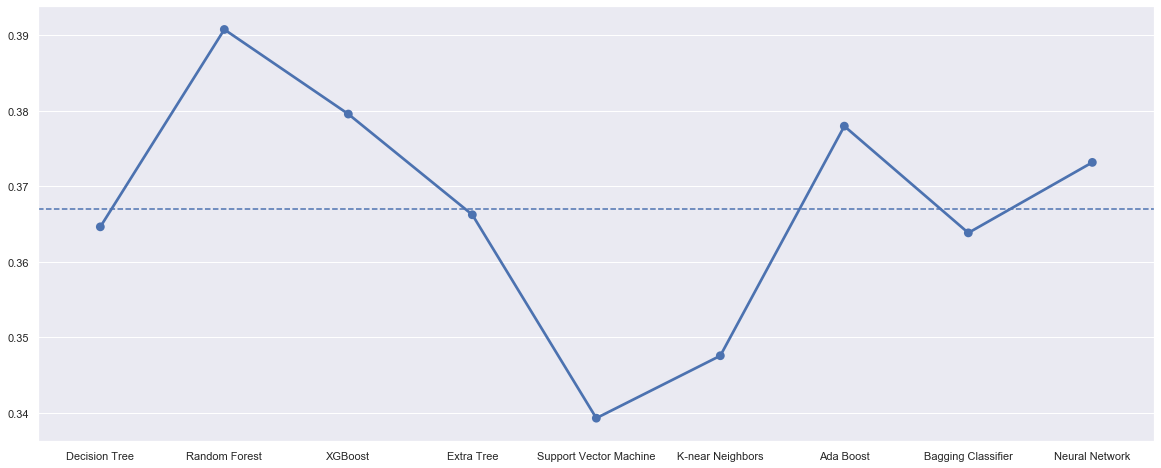

In [36]:
fig, ax1 = plt.subplots(ncols=1, sharey=True,figsize=(20,8))
algorithms={'Decision Tree':dectree.score(X_test, y_test),
            'Random Forest':rforest.score(X_test, y_test),
            'XGBoost':XGB.score(X_test, y_test),
            'Extra Tree': ext.score(X_test, y_test),
            'Support Vector Machine':svc.score(X_test, y_test),
            'K-near Neighbors':KNN.score(X_test, y_test),
            'Ada Boost':abc.score(X_test, y_test),
            'Bagging Classifier':bgc.score(X_test, y_test),
            'Neural Network':test_acc}
graph = pd.DataFrame(data=algorithms,index=[0])

# Finding the average accuracy of all 9 models
avg = (dectree.score(X_test, y_test) 
    + rforest.score(X_test, y_test) 
    + XGB.score(X_test, y_test) 
    + ext.score(X_test, y_test) 
    + svc.score(X_test, y_test) 
    + KNN.score(X_test, y_test)
    + abc.score(X_test, y_test)
    + bgc.score(X_test, y_test)
    + test_acc)/9
sb.pointplot(data=graph,ax=ax1, ax1=ax1.axhline(avg, ls='--'));

But what about reliability? The boxplot below shows how these models fare over multiple Train-Test Splits. The models were trained over 50 different random Train-Test Splits and evaluated. This is to account for any variance in the way the data is picked and acts as a form of cross-validation. As we can see, **AdaBoost** is the most accurate one in terms of predicting the `AdoptionSpeed` of animals. 

![Models](Models.png)

Surprisingly, despite having over 99% accuracy for the train data, the K-Neighbours Classifier fails to match the accuracy of even the Decision Tree.

We want to get the best of both worlds - a model that has relatively high classification accuracy for both the Train and Test datasets. Ultimately, the goal of our model is to classify each pet in order to predict its adoption speed. While the K-Nearest Neighbours model certainly gives us the highest accuracy for the Train dataset, its accuracy for the Test dataset is disappointingly low. The next best model would be AdaBoost, which gives us one of the highest accuracies for Train dataset, on top of the highest accuracy for the Test dataset. Therefore, AdaBoost is the model we want.

---
## Using the AdaBoost Model

### Model Fit

Since we are using the AdaBoost Model, we first need to check that the model is at its optimal fit. The line graph below shows the training accuracy at every stage of the training process over 50 boosts (default). As we can see the blue line - which stands for the training accuracy - is levelling out at near 100%. Hence any more training will not make the model perform any better.

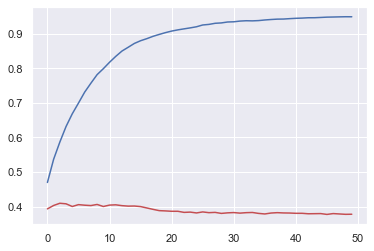

In [37]:
# Plot train accuracy values
train_accuracy = np.zeros(50)
y_train_pred = abc.staged_predict(X_train)
for iteration, result in enumerate(y_train_pred):
    train_accuracy[iteration] = accuracy_score(y_train, result)

# Plot test accuracy values
test_accuracy = np.zeros(50)
y_test_pred = abc.staged_predict(X_test)
for iteration, result in enumerate(y_test_pred):
    test_accuracy[iteration] = accuracy_score(y_test, result)

plt.plot(np.arange(0,50, dtype = int), train_accuracy, 'b-', label = 'Training Accuracy')
plt.plot(np.arange(0,50, dtype = int), test_accuracy, 'r-', label = 'Test Accuracy')

### Feature Importance

Since we now have a model that can predict the adoption speed of animals with a reasonable degree of accuracy, we can now take a look at the features that have a significant impact on the `AdoptionSpeed` of the animal. As seen below, the kind of variables that are more important tend to be **Numeric** in nature such as the `Description`, `Age`, `PhotoAmt` and `Quantity`. **Categorical** Variables tend to score lower. Below is the feature importance by broad category.

![Importance](Importance.jpeg)
***Note***: Since this data was split for One-Hot encoding, the importances of the same variable (e.g. `Gender_1`, `Gender_2` and `Gender_3`) were added together to generate the above graph.

Below is the feature importance by specific category.

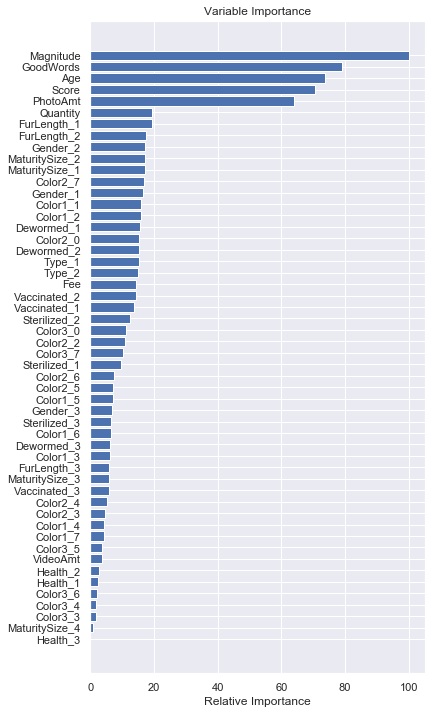

In [38]:
# Plot feature importance
feature_importance = abc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (6, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, predictors.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

We can derive from the above 2 graphs that the top 3 variables are **Magnitude**, **GoodWords**, and **Age**. Therefore, this tells us that having more keywords that are commonly used and having more emotional sentences in the descriptive text contributes to greater **AdoptionSpeed**. Somehow, **Age** plays an important part as well!

However, it is important to take note that despite having this graph for reference to improve the appeal of the listing of the animals, there are certain features that are uncontrollable such as fur **Colour** and **Gender** of the animal.

---
## Conclusion

Now we can see predict reasonably well how fast an animal is going to be adopted and what are the specific features that affect this adoption speed. With this information in mind, we hope that people who are putting animals up for adoption can write the listings in a way that the animals will get adopted as quickly as possible. In doing so, we hope that more animals find homes and fewer animals are euthanised as a result.

---
# References

(Tutorial) Handling Categorical Data in Python. (n.d.). Retrieved from https://www.datacamp.com/community/tutorials/categorical-data

Bag of Words Meets Bags of Popcorn. (n.d.). Retrieved from https://www.kaggle.com/c/word2vec-nlp-tutorial/discussion/35237

Boosting in Machine Learning: Boosting and AdaBoost. (2019, May 6). Retrieved from https://www.geeksforgeeks.org/boosting-in-machine-learning-boosting-and-adaboost/

DeChampeaux, D., Faure, P., & Lea, D. (1994). Object-oriented system development. Reading, MA: Addison-Wesley.
Feature importances with forests of trees¶. (n.d.). Retrieved from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Frost, J., Salas, N., Charles, Rodrigues, L. de O., Mani, Jerry, & B., M. (2019, October 8). Boxplots vs. Individual Value Plots: Graphing Continuous Data by Groups. Retrieved from https://statisticsbyjim.com/basics/graph-groups-boxplots-individual-values/

Gandhi, R. (2020, April 16). Boosting Algorithms: AdaBoost, Gradient Boosting and XGBoost. Retrieved from https://hackernoon.com/boosting-algorithms-adaboost-gradient-boosting-and-xgboost-f74991cad38c

Difference between Random Forests and Decision tree. Retrieved from https://stats.stackexchange.com/questions/285834/difference-between-random-forests-and-decision-tree

Grus, J. (2019). Data science from scratch: first principles with Python. Sebastopol (CA): OReilly Media.
Hershy, A. (2020, February 4). Gini Index vs Information Entropy. Retrieved from https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb

Hope, T., Resheff, Y. S., & Lieder, I. (2017). Learning TensorFlow: a guide to building deep learning systems. Sebastopol (CA): OReilly.

Izxi. (n.d.). Evaluate the relationship between a categorical variable and a numerical variable? · Issue #17 · izxi/Learning. Retrieved from https://github.com/izxi/Learning/issues/17

Kuhn, M., & Johnson, K. (2020). Feature Engineering and Selection: a Practical Approach for Predictive Models. Boca Raton: CRC Press, Taylor & Francis Group.

Machine Learning with scikit-learn. (n.d.). Retrieved from https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php

Mahajan, K. M. K. (1965, November 1). When should I use Gini Impurity as opposed to Information Gain? Retrieved from https://datascience.stackexchange.com/questions/10228/when-should-i-use-gini-impurity-as-opposed-to-information-gain

numpy.zeros¶. (n.d.). Retrieved from https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html

r/MachineLearning - Why are extremely randomized trees more efficient than standard Random Forests? (n.d.). Retrieved from https://www.reddit.com/r/MachineLearning/comments/29uwi1/

r/MachineLearning - Why are extremely randomized trees more efficient than standard Random Forests? (n.d.). Retrieved from https://www.reddit.com/r/MachineLearning/comments/29uwi1/why_are_extremely_randomized_trees_more_efficient/

Random Forest Overfitting. (n.d.). Retrieved from https://mljar.com/blog/random-forest-overfitting/

How can I append a None value to a list in Python? Retrieved from https://stackoverflow.com/questions/23238489/how-can-i-append-a-none-value-to-a-list-in-python

sklearn.cross_validation.train_test_split¶. (n.d.). Retrieved from https://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html

sklearn.metrics.accuracy_score¶. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

Sujan, N. I. (2019, September 5). What is Entropy and why Information gain matter in Decision Trees? Retrieved from https://medium.com/coinmonks/what-is-entropy-and-why-information-gain-is-matter-4e85d46d2f01


Yadav, D. (2019, December 9). Categorical encoding using Label-Encoding and One-Hot-Encoder. Retrieved from https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
 
Documentations with reference from https://scikit-learn.org, https://seaborn.pydata.org and https://www.tensorflow.org/